# Rechnerarithmetik
Dieses Kapitel beschäftigt sich damit, wie Zahlen dargestellt werden, was für Fehler dabei entstehen können und wie sich diese bei Operationen fortpflanzen.

Lernziele:
- Sie verstehen die Definition der maschinendarstellbaren Zahlen.
- Sie können die Fehler, die beim Abbilden von reellen Zahlen auf Maschinenzahlen entstehen, sowie die Maschinengenauigkeit berechnen.
- Sie können die Fortpflanzung von Fehlern bei Funktionsauswertungen abschätzen und die Konditionszahl berechnen.

## Maschinenzahlen

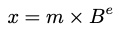

m = Mantisse, e = Exponent und B = Basis

(Computerintern wird üblicherweise die Basis B = 2 - für Binär - verwendet "1" und "0").

#### Aufgabe 2.1:
- Überlegen Sie sich: wie viele verschiedene Möglichkeiten gibt es, mit Binärzahlen ein Byte zu füllen?

$2^{8} = 256 Möglichkeiten$ (Wegen 1 Byte hat 8 Bits)

- Wie viele Ziffern bräuchten Sie im Hexadezimalsystem, um die gleiche Anzahl Möglichkeiten zu erhalten?

2 Ziffern, da $16^{2} = 256$

- Was folgern Sie daraus bzgl. der Vorteile des Hexadezimalsystems?

Ein Byte im Binärsystem kann durch 2 Ziffern im Hexadezimalsystem ersetzt werden. Lange binäre Zeichenketten lassen sich also im Hexade- zimalsystem sehr kompakt darstellen, wobei jeweils Gruppen mit 4 Bits durch eine Hexadezimal-Ziffer ersetzt werden kann.

Der exponent definiert die Position des Dezimalpunktes:

$x = 112.78350 = 112.78350 * 10^{0} = 1127835.0 * 10^{-4} = 0.11278350 * 10^{3}$

Wenn der Exponent:
- Positiv ist, dann geht die Kommastelle nach RECHTS.
- Negativ ist, dann get die Kommastelle nach LINKS.

Normiert und nicht normiert:
- Eine normierte Zahl hat als erste Ziffer vor dem Punkt eine 0 und die erste Ziffer nach dem Punkt ist ungleich 0.

#### Aufgabe 2.2:
- Wie viele Stellen benötigt man für die Mantisse, um die folgenden Zahlen als n-stellige Gleitpunktzahlen im Dezimalsystem darzustellen? Wie gross ist der zugehörige Exponent?

$x_{1} = 0.00010001, x_{2} = 1230001, x_{3} = \frac{4}{5}, x_{4} = \frac{1}{3}$

$x_{1} = 5$ Stellen, $x_{2} = 7$ Stellen, $x_{3} = 1$ Stelle, $x_{4} = 0.3333...$ ist fuer kein n als n-stellige Gleitpunktzahl darstellbar

- Bestimmen Sie alle dualen positiven 3-stelligen Gleitpunktzahlen mit einstelligem positiven binären Exponenten sowie ihren dezimalen Wert.

$0.000 * 2^{0} = 0, 0.100 * 2^{0} = 0.5, 0.101 * 2^{0} = 0.625, 0.110 * 2^{0} = 0.75, 0.111 * 2^{0} = 0.875, 0.100 * 2^{1} = 1, 0.101 * 2^{1} = 1.25 ...$

- Wie viele verschiedene Maschinenzahlen gibt es auf einem Rechner, der 20-stellige Gleitpunktzahlen mit 4- stelligen binären Exponenten sowie dazugehörige Vorzeichen im Dualsystem verwendet? Wie lautet die kleinste positive und die grösste Maschinenzahl?

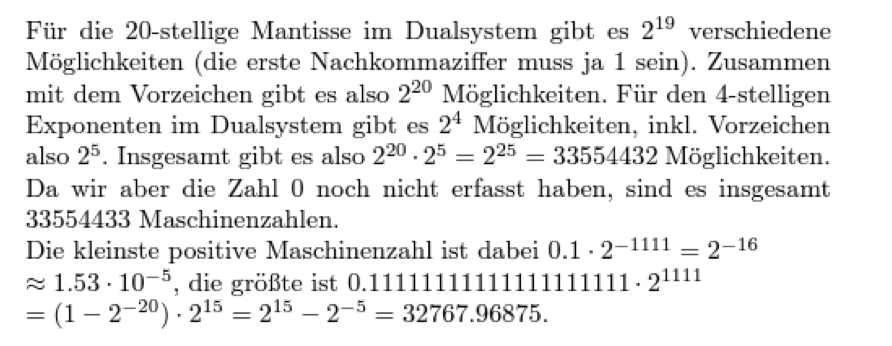

## Approximations- und Rundungsfehler

Formel um die groesste und kleinste Zahl herauszufinden:

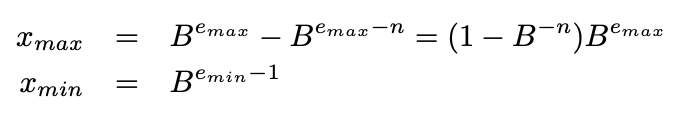

#### Aufgabe 2.3:
- Schreiben Sie die kleinste und grösste binäre positive Maschinenzahl für die Abbildung explizit auf und berechnen Sie deren Wert.

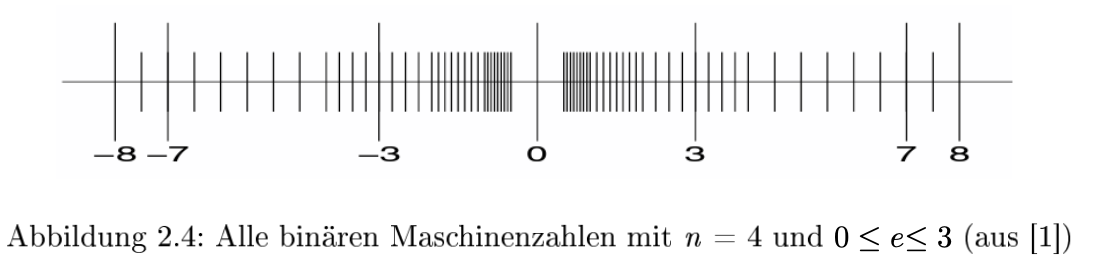

Lösung: $x_{max}=0.1111 * 2^{3} = 7.5 und x_{min} = 0.1000 * 2^{0} = 0.5$

- Stimmt das mit $x_{max}$ und $x_{min}$ überein?

Lösung: $x_{max} = 2^{3} - 2^{-1} = 7.5$ und $x_{xmin} = 2^{-1} = 0.5$. Antwort: ja.

### Rundungsfehler und Maschinengenauigkeit

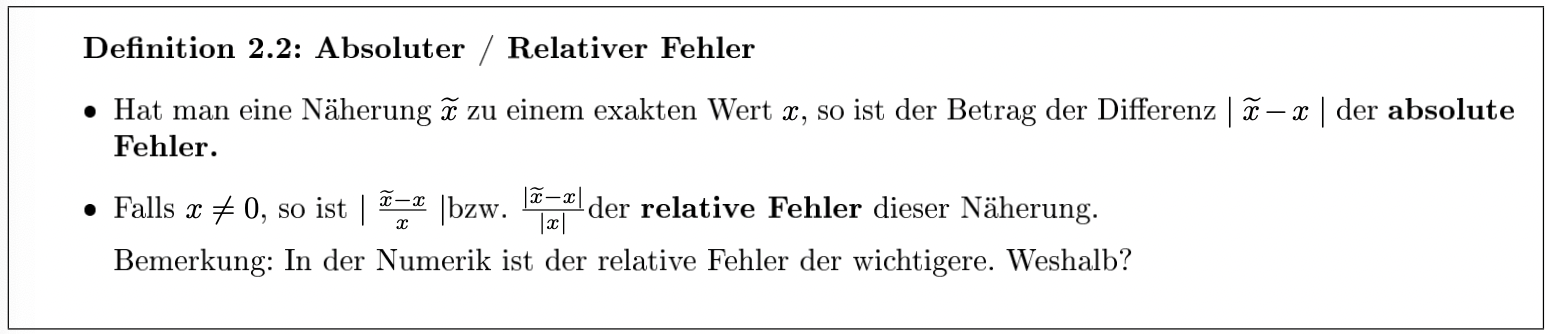

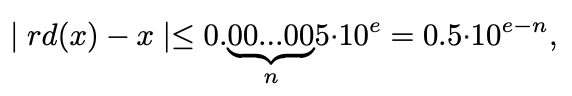

#### Beispiel:

Sei $x = 180.1234567 = 0.1801234567 · 10^{3}$. Gerundet auf eine siebenstellige Mantisse ($n = 7$) erhält man $rd(x) = 0.1801235 · 10^{3}$ und es gilt wegen $e = 3$

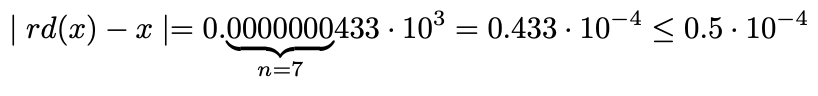

#### Aufgabe 2.4:

- Vergewissern Sie sich anhand einfacher Zahlenbeispiele, dass die Rundung ein besseres Verfahren für die Abbildung einer reellen Zahl auf eine Maschinenzahl darstellt als einfaches Abschneiden der überzähligen Ziffern. Was ist der maximale Fehler, der durch das Abschneiden auftreten kann?

Lösung: 0.739 im Dezimalsystem. Durch Abschneiden eine zwei- setllige Mantisse -> 0.73 mit einem absolutem Fehler von 0.009. Wenn man jedoch rundet erhält man 0.74 mit einem absoluten Fehler von 0.001. Der maximale Fehler bei einer Rundung beträgt 0.005 (z.B. wird 0.7350 auf 0.74 aufgerundet), während der maximale Fehler beim Abschneiden (fast) doppelt so gross sein kann (z.B. wird 0.7399 auf 0.73 abgeschnitten) mit dem absoluten Fehler von (fast) 0.01.

### Maschinengenauigkeit:
Sie gibt den maximalen relativen Fehler, der durch Rundung entstehen kann.

$eps := \frac{B}{2} * B^{-n}$

#### Aufgabe 2.5:
- Berechnen Sie $s := \sum_{i=1}^{300}\frac{1}{i^{2}}$ sowohl auf- als auch absteigend, je einmal mit 3-stelliger und 5-stelliger Gleitpunktarithmetik.

Loesung: 

In [24]:
import numpy as np

def calculateFunctionWithBaseAndRound(f, rangeX, base, decimalPlace):
    exact_result = 0
    for i in range(1,rangeX+1):
        # bevor addiert wird, wird die funktion f(x) aufgerufen und das ergebnis mit der Basis und dem decimalPlace gerundet
        exact_result += base*round(f(i)/base,decimalPlace)
    return exact_result

def foo(i): 
    return 1/i**2

print(calculateFunctionWithBaseAndRound(foo, 300, 10, 3))
print(calculateFunctionWithBaseAndRound(foo, 300, 10, 5))

1.59
1.6389999999999976


### Fehlerfortpflanzung bei Funktionsauswertungen / Konditionierung

# Numerische Lösung von Nullstellenproblemen

## Fixpunktiteration

## Newton Verfahren

### Vereinfachtes Newton Verfahren

### Sekantenverfahren

## Konvergenzgeschwindigkeit

## Fehlerabschätzung

# Numerische Lösung linearer Gleichungssysteme

## Gaussalgorithmus

## Fehlerfortpflanzung beim Gauss-Algorithmus und Pivotisierung

## Dreieckszerlegung von Matrizen